# Import librairies

In [1]:
# To check PEP8 need installation : pip install flake8 pycodestyle pycodestyle_magic
# add %%flake8 in each block to check it
%load_ext pycodestyle_magic

In [80]:
# %%flake8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.dummy import DummyClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, \
    GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, \
    cross_validate, KFold, RandomizedSearchCV
from sklearn.metrics import fbeta_score, make_scorer, roc_curve, \
    roc_auc_score, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

# Load data files

In [3]:
# %%flake8

data_train = pd.read_csv('data_train.csv')

# Overview of data

In [4]:
# To optimize display of the Dataframe

#increase max rows displayed to 999
pd.set_option('display.max_rows', 999)

#increase max columns displayed to 999
pd.set_option('display.max_columns', 999)
#increase columns width to 100
pd.set_option('display.max_colwidth', 200)

# Formating float
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# %%flake8

# define random_state
rd_state = 16

**Train data**

In [6]:
data_train.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATIO

In [7]:
data_train.describe(include='all')

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATIO

In [8]:
data_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 245 columns):
 #    Column                                             Non-Null Count   Dtype  
---   ------                                             --------------   -----  
 0    SK_ID_CURR                                         307511 non-null  int64  
 1    NAME_CONTRACT_TYPE                                 307511 non-null  int64  
 2    FLAG_OWN_CAR                                       307511 non-null  int64  
 3    FLAG_OWN_REALTY                                    307511 non-null  int64  
 4    CNT_CHILDREN                                       307511 non-null  int64  
 5    AMT_INCOME_TOTAL                                   307511 non-null  float64
 6    AMT_CREDIT                                         307511 non-null  float64
 7    AMT_ANNUITY                                        307499 non-null  float64
 8    AMT_GOODS_PRICE                                    307233 non-

In [9]:
print('data_train number of rows : {}' .format(data_train.shape[0]))
print('data_train number of columns : {}' .format(data_train.shape[1]))

data_train number of rows : 307511
data_train number of columns : 245


# Modelization test

## Split train / test data

In [103]:
# %%flake8

# split data between features and target
X = data_train.drop(columns=['TARGET'])
y = data_train['TARGET']

# Feature names
features = list(data_train.columns)

In [104]:
# %%flake8

# Separation training / testing set use stratify due to classes are imbalanced
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=rd_state, stratify=y)

In [105]:
# %%flake8

# sampling X_train
X_sample_train, X_sample_test, y_sample_train, y_sample_test = \
    train_test_split(
        X_train, y_train, train_size=0.2,
        random_state=rd_state, stratify=y_train)

## Testing model

In [13]:
# %%flake8

# dictionnary of score
# create a fbeta score
f2_scorer = make_scorer(fbeta_score, beta=2)
scores = {'AUC': 'roc_auc', 'fbeta': f2_scorer,
          'precision_recall_curve': 'average_precision'}

In [14]:
#define cv
cv=KFold(5,shuffle=True,random_state=0)

In [15]:
# %%flake8

def test_model_grid(X_train, y_train, steps, params):

    ''' create function to test different model '''

    pipeline = imbpipeline(steps=steps)

    grid = GridSearchCV(
        pipeline, param_grid=params, cv=cv, return_train_score=True,
        scoring=scores, refit='precision_recall_curve', n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid

In [16]:
# %%flake8

def test_model_randomsearch(X_train, y_train, steps, params, nb_iter):

    ''' create function to test different model '''

    pipeline = imbpipeline(steps=steps)

    random = RandomizedSearchCV(
        pipeline, param_distributions=params, n_iter=nb_iter,
        cv=cv, return_train_score=True,
        scoring=scores, refit='precision_recall_curve', n_jobs=-1)
    random.fit(X_train, y_train)
    return random

### Dumy classifier

In [17]:
# %%flake8

# parameters to test for DummyClassifier

# Median imputation of missing values
imputer = SimpleImputer(strategy='median')

# Normalize values
scaler = StandardScaler()

# class are imbalanced
# oversampling of the minority class
over = SMOTE(random_state=rd_state)

# undersampling of the majority class
under = RandomUnderSampler(random_state=rd_state)

# classifier to test
classifier = DummyClassifier(random_state=rd_state)

# steps for the pipeline
steps_dc = [['imputer', imputer], ['scaler', scaler],
                         ['over', over], ['under', under],
                         ['classifier', classifier]]

# parameters to test
params_dc = {}

# Number of iteration
n_iter_dc = 1

In [18]:
# # %%flake8

# gridsearch is too long

# # use function test_model_grid
# grid_dc = test_model_grid(
#     X_sample_train, y_sample_train, steps_dc, params_dc)

In [19]:
%%time

# %%flake8

random_dc = test_model_randomsearch(
    X_sample_train, y_sample_train, steps_dc, params_dc, n_iter_dc)

Wall time: 22.9 s


In [20]:
# %%flake8

def display_result(grid, model):
    ''' create function to display dataframe of the results '''
    results = pd.DataFrame(grid.cv_results_)
    results.insert(0, 'Model', model)
    display(results)
    return results

In [21]:
# %%flake8

# use function display_result to display dataframe
# of the result for DummyClassifier
results_dc = display_result(
    random_dc, 'DummyClassifier')

,Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,split3_train_AUC,split4_train_AUC,mean_train_AUC,std_train_AUC,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,split4_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta,split0_train_fbeta,split1_train_fbeta,split2_train_fbeta,split3_train_fbeta,split4_train_fbeta,mean_train_fbeta,std_train_fbeta,split0_test_precision_recall_curve,split1_test_precision_recall_curve,split2_test_precision_recall_curve,split3_test_precision_recall_curve,split4_test_precision_recall_curve,mean_test_precision_recall_curve,std_test_precision_recall_curve,rank_test_precision_recall_curve,split0_train_precision_recall_curve,split1_train_precision_recall_curve,split2_train_precision_recall_curve,split3_train_precision_recall_curve,split4_train_precision_recall_curve,mean_train_precision_recall_curve,std_train_precision_recall_curve
0,DummyClassifier,6.32,1.57,0.57,0.06,{},0.50,0.50,0.50,0.50,0.50,0.50,0.00,1,0.50,0.50,0.50,0.50,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.08,0.09,0.08,0.08,0.08,0.00,1,0.08,0.08,0.08,0.08,0.08,0.08,0.00


In [22]:
# %%flake8

def display_score(result, grid):
    ''' create function to display score and best params for a model '''

    print('Fit time: %.2f' % result.loc[grid.best_index_]['mean_fit_time'])
    print('AUC score: %.3f' % result.loc[grid.best_index_]['mean_test_AUC'])
    print('fbeta score: %.3f' % result.loc[grid.best_index_]
          ['mean_test_fbeta'])
    print('precision_recall_curve score: %.3f' % grid.best_score_)
    print('Best parameters: %s' % grid.best_params_)

In [23]:
# %%flake8
# use function display_score to display score and
# best_params for DummyClassifier
display_score(results_dc, random_dc)

Fit time: 6.32
AUC score: 0.500
fbeta score: 0.000
precision_recall_curve score: 0.081
Best parameters: {}


In [24]:
# %%flake8

# save results to csv
results_dc.to_csv('results_dummyclassifier.csv', index = False)

### Logistic Regression

In [25]:
# %%flake8

# parameters to test for LogisticRegression

# Median imputation of missing values
imputer = SimpleImputer(strategy='median')

# Normalize values
scaler = StandardScaler()

# class are imbalanced
# oversampling of the minority class
over = SMOTE(random_state=rd_state)

# undersampling of the majority class
under = RandomUnderSampler(random_state=rd_state)

# classifier to test
classifier = LogisticRegression(random_state=rd_state, max_iter=10000)

# steps for the pipeline
steps_lr = [['imputer', imputer], ['scaler', scaler],
                            ['over', over], ['under', under],
                            ['classifier', classifier]]

# parameters to test
params_lr = {'classifier__C': [0.1, 1, 10, 100],
                             'over__sampling_strategy': [0.1, 0.2, 0.3],
                             'under__sampling_strategy': [0.4, 0.5, 0.6]}

# Number of iteration
n_iter_lr = 30

In [26]:
# %%flake8

# gridsearch is too long

# # use function test_model_grid
# grid_lr = test_model_grid(
#     X_sample_train, y_sample_train, steps_lr,
#     params_lr)

In [27]:
%%time

# %%flake8

random_lr = test_model_randomsearch(
    X_sample_train, y_sample_train, steps_lr, params_lr, n_iter_lr)

Wall time: 11min 7s


In [28]:
# %%flake8

# use function display_result to display
# dataframe of the result for LogisticRegression
results_lr = display_result(random_lr, 'LogisticRegression')

,Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_under__sampling_strategy,param_over__sampling_strategy,param_classifier__C,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,split3_train_AUC,split4_train_AUC,mean_train_AUC,std_train_AUC,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,split4_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta,split0_train_fbeta,split1_train_fbeta,split2_train_fbeta,split3_train_fbeta,split4_train_fbeta,mean_train_fbeta,std_train_fbeta,split0_test_precision_recall_curve,split1_test_precision_recall_curve,split2_test_precision_recall_curve,split3_test_precision_recall_curve,split4_test_precision_recall_curve,mean_test_precision_recall_curve,std_test_precision_recall_curve,rank_test_precision_recall_curve,split0_train_precision_recall_curve,split1_train_precision_recall_curve,split2_train_precision_recall_curve,split3_train_precision_recall_curve,split4_train_precision_recall_curve,mean_train_precision_recall_curve,std_train_precision_recall_curve
0,LogisticRegression,22.10,2.32,0.70,0.09,0.50,0.30,10,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.3, 'classifier__C': 10}",0.74,0.72,0.73,0.74,0.72,0.73,0.01,25,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.35,0.34,0.35,0.35,0.34,0.35,0.01,16,0.37,0.37,0.36,0.37,0.37,0.37,0.00,0.22,0.20,0.22,0.20,0.19,0.21,0.01,24,0.22,0.23,0.22,0.23,0.23,0.23,0.01
1,LogisticRegression,9.29,0.72,0.74,0.04,0.50,0.10,10,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.1, 'classifier__C': 10}",0.74,0.73,0.73,0.74,0.73,0.73,0.00,6,0.75,0.76,0.75,0.75,0.76,0.75,0.00,0.35,0.34,0.36,0.34,0.34,0.35,0.01,20,0.37,0.37,0.37,0.37,0.37,0.37,0.00,0.22,0.21,0.23,0.20,0.19,0.21,0.01,19,0.22,0.23,0.22,0.22,0.23,0.23,0.01
2,LogisticRegression,15.44,1.17,0.69,0.03,0.40,0.30,1,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.3, 'classifier__C': 1}",0.74,0.72,0.73,0.73,0.72,0.73,0.01,23,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.31,0.30,0.31,0.32,0.31,0.31,0.01,26,0.33,0.33,0.32,0.33,0.33,0.33,0.00,0.22,0.20,0.23,0.20,0.19,0.21,0.02,15,0.22,0.23,0.22,0.23,0.23,0.23,0.00
3,LogisticRegression,24.93,4.22,0.76,0.09,0.60,0.30,100,"{'under__sampling_strategy': 0.6, 'over__sampling_strategy': 0.3, 'classifier__C': 100}",0.73,0.72,0.73,0.73,0.72,0.73,0.01,30,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.37,0.36,0.38,0.37,0.38,0.37,0.01,7,0.39,0.39,0.39,0.39,0.39,0.39,0.00,0.22,0.20,0.22,0.20,0.19,0.21,0.01,29,0.22,0.23,0.22,0.23,0.23,0.22,0.01
4,LogisticRegression,9.43,0.81,0.65,0.05,0.60,0.10,10,"{'under__sampling_strategy': 0.6, 'over__sampling_strategy': 0.1, 'classifier__C': 10}",0.74,0.73,0.73,0.74,0.73,0.73,0.00,7,0.75,0.75,0.75,0.75,0.76,0.75,0.00,0.38,0.37,0.38,0.38,0.38,0.38,0.00,1,0.39,0.40,0.39,0.39,0.39,0.39,0.00,0.22,0.20,0.23,0.20,0.19,0.21,0.01,27,0.22,0.23,0.22,0.21,0.23,0.22,0.01
5,LogisticRegression,17.89,2.09,0.72,0.07,0.50,0.20,100,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.2, 'classifier__C': 100}",0.74,0.72,0.73,0.74,0.72,0.73,0.01,18,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.35,0.33,0.36,0.35,0.35,0.35,0.01,13,0.37,0.37,0.37,0.37,0.37,0.37,0.00,0.22,0.20,0.23,0.20,0.19,0.21,0.01,14,0.22,0.23,0.22,0.22,0.24,0.23,0.01
6,LogisticRegression,9.80,0.38,0.70,0.07,0.40,0.10,10,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.1, 'classifier__C': 10}",0.74,0.73,0.74,0.74,0.73,0.73,0.00,3,0.75,0.76,0.75,0.75,0.76,0.75,0.00,0.31,0.30,0.32,0.30,0.30,0.31,0.01,28,0.33,0.33,0.32,0.32,0.33,0.32,0.00,0.22,0.21,0.23,0.20,0.19,0.21,0.01,7,0.23,0.23,0.22,0.23,0.24,0.23,0.00
7,LogisticRegression,13.09,2.25,0.69,0.05,0.40,0.10,100,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.1, 'classifier__C': 100}",0.74,0.73,0.74,0.74,0.73,0.73,0.00,4,0.75,0.76,0.75,0.75,0.76,0.75,0.00,0.31,0.30,0.32,0.30,0.30,0.31,0.01,29,0.33,0.33,0.32,0.32,0.33,0.32,0.00,0.

In [29]:
# %%flake8

# use function display_score to display score and
# best_params for LogisticRegression
display_score(results_lr, random_lr)

Fit time: 7.89
AUC score: 0.731
fbeta score: 0.312
precision_recall_curve score: 0.210
Best parameters: {'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.2, 'classifier__C': 0.1}


In [30]:
# %%flake8

# save results to csv
results_lr.to_csv('results_logisticregression.csv', index = False)

### Random Forest Classifier

In [31]:
# %%flake8

# parameters to test for RandomForestClassifier

# Median imputation of missing values
imputer = SimpleImputer(strategy='median')

# Normalize values
scaler = StandardScaler()

# class are imbalanced
# oversampling of the minority class
over = SMOTE(random_state=rd_state)

# undersampling of the majority class
under = RandomUnderSampler(random_state=rd_state)

# classifier to test
classifier = RandomForestClassifier(random_state=rd_state)

# steps for the pipeline
steps_rfc = [['imputer', imputer], ['scaler', scaler],
                                      ['over', over], ['under', under],
                                      ['classifier', classifier]]

# parameters to test
params_rfc = {
    'classifier__max_depth': np.arange(10, 50, 5),
    'classifier__min_samples_split': np.arange(2, 20, 2),
    'classifier__bootstrap': [True],
    'over__sampling_strategy': [0.1, 0.2, 0.3],
    'under__sampling_strategy': [0.4, 0.5, 0.6]}

# Number of iteration
n_iter_rfc = 25

In [32]:
# %%flake8

# gridsearch is too long

# # use function test_model_grid
# grid_rfc = test_model_grid(
#     X_sample_train, y_sample_train, steps_rfcr,
#     params_rfc)

In [33]:
%%time

# %%flake8

random_rfc = test_model_randomsearch(
    X_sample_train, y_sample_train, steps_rfc, params_rfc, n_iter_rfc)

Wall time: 9min 50s


In [34]:
# %%flake8

# use function display_result to display
# dataframe of the result for RandomForestClassifier
results_rfc = display_result(
    random_rfc, 'RandomForestClassifier')

,Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_under__sampling_strategy,param_over__sampling_strategy,param_classifier__min_samples_split,param_classifier__max_depth,param_classifier__bootstrap,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,split3_train_AUC,split4_train_AUC,mean_train_AUC,std_train_AUC,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,split4_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta,split0_train_fbeta,split1_train_fbeta,split2_train_fbeta,split3_train_fbeta,split4_train_fbeta,mean_train_fbeta,std_train_fbeta,split0_test_precision_recall_curve,split1_test_precision_recall_curve,split2_test_precision_recall_curve,split3_test_precision_recall_curve,split4_test_precision_recall_curve,mean_test_precision_recall_curve,std_test_precision_recall_curve,rank_test_precision_recall_curve,split0_train_precision_recall_curve,split1_train_precision_recall_curve,split2_train_precision_recall_curve,split3_train_precision_recall_curve,split4_train_precision_recall_curve,mean_train_precision_recall_curve,std_train_precision_recall_curve
0,RandomForestClassifier,16.32,0.42,1.17,0.06,0.50,0.30,16,40,True,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.3, 'classifier__min_samples_split': 16, 'classifier__max_depth': 40, 'classifier__bootstrap': True}",0.72,0.70,0.71,0.71,0.71,0.71,0.01,19,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.02,0.02,0.02,0.02,0.02,0.02,0.00,21,0.59,0.63,0.61,0.63,0.62,0.62,0.01,0.20,0.18,0.20,0.18,0.16,0.18,0.01,16,0.96,0.96,0.95,0.97,0.96,0.96,0.01
1,RandomForestClassifier,7.71,0.18,1.04,0.05,0.40,0.10,16,15,True,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.1, 'classifier__min_samples_split': 16, 'classifier__max_depth': 15, 'classifier__bootstrap': True}",0.74,0.71,0.73,0.73,0.72,0.73,0.01,3,0.93,0.93,0.94,0.93,0.93,0.93,0.00,0.14,0.15,0.13,0.12,0.14,0.14,0.01,5,0.47,0.48,0.47,0.47,0.48,0.48,0.01,0.22,0.19,0.22,0.20,0.19,0.20,0.01,3,0.63,0.61,0.61,0.63,0.61,0.62,0.01
2,RandomForestClassifier,10.58,0.28,1.11,0.08,0.50,0.20,12,15,True,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.2, 'classifier__min_samples_split': 12, 'classifier__max_depth': 15, 'classifier__bootstrap': True}",0.74,0.70,0.71,0.72,0.71,0.72,0.01,9,0.96,0.96,0.96,0.96,0.96,0.96,0.00,0.07,0.08,0.08,0.06,0.07,0.07,0.01,8,0.44,0.46,0.45,0.44,0.46,0.45,0.01,0.21,0.18,0.21,0.19,0.16,0.19,0.02,8,0.72,0.73,0.71,0.75,0.72,0.73,0.02
3,RandomForestClassifier,11.90,0.13,1.10,0.06,0.40,0.20,16,15,True,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.2, 'classifier__min_samples_split': 16, 'classifier__max_depth': 15, 'classifier__bootstrap': True}",0.73,0.70,0.72,0.72,0.71,0.72,0.01,7,0.96,0.96,0.96,0.96,0.96,0.96,0.00,0.02,0.03,0.03,0.02,0.02,0.02,0.00,19,0.22,0.23,0.24,0.24,0.24,0.23,0.01,0.21,0.18,0.22,0.19,0.17,0.19,0.02,7,0.73,0.71,0.71,0.75,0.72,0.73,0.01
4,RandomForestClassifier,11.58,0.13,0.92,0.05,0.60,0.30,16,10,True,"{'under__sampling_strategy': 0.6, 'over__sampling_strategy': 0.3, 'classifier__min_samples_split': 16, 'classifier__max_depth': 10, 'classifier__bootstrap': True}",0.72,0.68,0.70,0.71,0.70,0.70,0.01,25,0.84,0.84,0.84,0.84,0.84,0.84,0.00,0.05,0.08,0.08,0.07,0.07,0.07,0.01,9,0.10,0.14,0.13,0.13,0.13,0.13,0.01,0.19,0.16,0.19,0.18,0.15,0.18,0.02,25,0.31,0.31,0.29,0.33,0.32,0.31,0.01
5,RandomForestClassifier,13.13,0.26,1.23,0.10,0.40,0.20,4,45,True,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.2, 'classifier__min_samples_split': 4, 'classifier__max_depth': 45, 'classifier__bootstrap': True}",0.72,0.70,0.71,0.71,0.71,0.71,0.01,16,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.02,0.03,0.03,0.03,0.03,0.03,0.00,16,0.99,0.99,0.99,0.99,0.99,0.99,0.00,0.20,0.18,0.20,0.18,0.17,0.19,0.01,13,1.00,1.00,1.00,1.00,1.00,1.00,0.00
6,RandomForestClassifier,9.29,0.41,0.92,0.05,0.50,0.20,2,10,T

In [35]:
# %%flake8

# use function display_score to display score and
# best_params for RandomForestClassifier
display_score(results_rfc, random_rfc)

Fit time: 6.78
AUC score: 0.726
fbeta score: 0.082
precision_recall_curve score: 0.206
Best parameters: {'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.1, 'classifier__min_samples_split': 8, 'classifier__max_depth': 10, 'classifier__bootstrap': True}


In [36]:
# %%flake8

# save results to csv
results_rfc.to_csv('results_randomforestclassifier.csv', index = False)

### Hist Gradient Boosting Classifier

In [37]:
# %%flake8

# parameters to test for HistGradientBoostingClassifier

# Median imputation of missing values
imputer = SimpleImputer(strategy='median')

# Normalize values
scaler = StandardScaler()

# class are imbalanced
# oversampling of the minority class
over = SMOTE(random_state=rd_state)

# undersampling of the majority class
under = RandomUnderSampler(random_state=rd_state)

# classifier to test
classifier = HistGradientBoostingClassifier(random_state=rd_state)

# steps for the pipeline
steps_hgbc = [['imputer', imputer], ['scaler', scaler],
                                      ['over', over], ['under', under],
                                      ['classifier', classifier]]

# parameters to test
params_hgbc = {
    'classifier__loss': ['binary_crossentropy'],
    'classifier__learning_rate': np.arange(0.05,0.2, 0.05),
    'classifier__max_iter':np.arange(100,400, 100),
    'classifier__max_depth': np.arange(10, 100, 10),
    'over__sampling_strategy': [0.1, 0.2, 0.3],
    'under__sampling_strategy': [0.4, 0.5, 0.6]}

# Number of iteration
n_iter_hgbc = 25

In [38]:
# %%flake8

# gridsearch is too long

# # use function test_model_grid
# grid_hgbc = test_model_grid(
#     X_sample_train, y_sample_train, steps_hgbc,
#     params_hgbc)

In [39]:
%%time

# %%flake8

random_hgbc = test_model_randomsearch(
    X_sample_train, y_sample_train, steps_hgbc, params_hgbc, n_iter_hgbc)

Wall time: 13min 32s


In [40]:
# %%flake8

# use function display_result to display
# dataframe of the result for RandomForestClassifier
results_hgbc = display_result(
    random_hgbc, 'HistGradientBoostingClassifier')

,Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_under__sampling_strategy,param_over__sampling_strategy,param_classifier__max_iter,param_classifier__max_depth,param_classifier__loss,param_classifier__learning_rate,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,split3_train_AUC,split4_train_AUC,mean_train_AUC,std_train_AUC,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,split4_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta,split0_train_fbeta,split1_train_fbeta,split2_train_fbeta,split3_train_fbeta,split4_train_fbeta,mean_train_fbeta,std_train_fbeta,split0_test_precision_recall_curve,split1_test_precision_recall_curve,split2_test_precision_recall_curve,split3_test_precision_recall_curve,split4_test_precision_recall_curve,mean_test_precision_recall_curve,std_test_precision_recall_curve,rank_test_precision_recall_curve,split0_train_precision_recall_curve,split1_train_precision_recall_curve,split2_train_precision_recall_curve,split3_train_precision_recall_curve,split4_train_precision_recall_curve,mean_train_precision_recall_curve,std_train_precision_recall_curve
0,HistGradientBoostingClassifier,44.05,4.60,1.11,0.05,0.50,0.30,300,90,binary_crossentropy,0.05,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.3, 'classifier__max_iter': 300, 'classifier__max_depth': 90, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.74,0.73,0.74,0.73,0.73,0.73,0.01,12,0.92,0.89,0.92,0.92,0.92,0.91,0.01,0.08,0.10,0.09,0.08,0.09,0.09,0.01,21,0.27,0.20,0.28,0.28,0.28,0.26,0.03,0.22,0.21,0.23,0.20,0.19,0.21,0.01,12,0.57,0.47,0.57,0.58,0.57,0.55,0.04
1,HistGradientBoostingClassifier,26.59,1.03,0.99,0.03,0.60,0.20,200,50,binary_crossentropy,0.05,"{'under__sampling_strategy': 0.6, 'over__sampling_strategy': 0.2, 'classifier__max_iter': 200, 'classifier__max_depth': 50, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.75,0.73,0.74,0.73,0.72,0.74,0.01,6,0.87,0.87,0.87,0.88,0.88,0.87,0.00,0.24,0.23,0.23,0.20,0.21,0.22,0.01,13,0.39,0.39,0.38,0.38,0.41,0.39,0.01,0.24,0.21,0.24,0.20,0.19,0.21,0.02,4,0.41,0.41,0.40,0.43,0.42,0.41,0.01
2,HistGradientBoostingClassifier,36.40,3.04,1.10,0.05,0.40,0.20,300,30,binary_crossentropy,0.05,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.2, 'classifier__max_iter': 300, 'classifier__max_depth': 30, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.74,0.73,0.74,0.73,0.73,0.74,0.01,10,0.88,0.91,0.92,0.91,0.91,0.91,0.01,0.11,0.13,0.12,0.12,0.13,0.12,0.01,19,0.27,0.32,0.35,0.31,0.35,0.32,0.03,0.22,0.20,0.23,0.21,0.19,0.21,0.01,10,0.47,0.52,0.56,0.52,0.54,0.52,0.03
3,HistGradientBoostingClassifier,34.71,0.28,1.05,0.04,0.50,0.30,200,70,binary_crossentropy,0.05,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.3, 'classifier__max_iter': 200, 'classifier__max_depth': 70, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.75,0.73,0.74,0.74,0.73,0.74,0.01,8,0.88,0.88,0.88,0.88,0.88,0.88,0.00,0.07,0.10,0.09,0.08,0.09,0.08,0.01,22,0.18,0.19,0.19,0.20,0.19,0.19,0.00,0.23,0.21,0.23,0.20,0.19,0.21,0.02,8,0.44,0.45,0.45,0.45,0.45,0.45,0.00
4,HistGradientBoostingClassifier,21.09,0.23,1.07,0.08,0.60,0.10,200,20,binary_crossentropy,0.20,"{'under__sampling_strategy': 0.6, 'over__sampling_strategy': 0.1, 'classifier__max_iter': 200, 'classifier__max_depth': 20, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.73,0.72,0.71,0.71,0.71,0.72,0.01,24,0.97,0.97,0.97,0.97,0.97,0.97,0.00,0.36,0.36,0.36,0.35,0.33,0.35,0.01,4,0.75,0.74,0.74,0.74,0.74,0.75,0.00,0.20,0.19,0.22,0.19,0.18,0.20,0.02,25,0.64,0.64,0.64,0.65,0.65,0.65,0.00
5,HistGradientBoostingClassifier,18.81,1.34,0.90,0.07,0.40,0.10,300,60,binary_crossentropy,0.05,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy':

In [41]:
# %%flake8

# use function display_score to display score and
# best_params for GradientBoostingClassifier
display_score(results_hgbc, random_hgbc)

Fit time: 18.81
AUC score: 0.741
fbeta score: 0.289
precision_recall_curve score: 0.218
Best parameters: {'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.1, 'classifier__max_iter': 300, 'classifier__max_depth': 60, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': 0.05}


In [42]:
# %%flake8

# save results to csv
results_hgbc.to_csv('results_histgradientboostingclassifier.csv', index = False)

## Compare models

In [43]:
# %%flake8

# create a dataframe with the best parameters for each model
result = pd.concat([results_dc.iloc[[random_dc.best_index_]],
                    results_lr.iloc[[random_lr.best_index_]],
                    results_rfc.iloc[[random_rfc.best_index_]],
                    results_hgbc.iloc[[random_hgbc.best_index_]]])
result

,Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,split3_train_AUC,split4_train_AUC,mean_train_AUC,std_train_AUC,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,split4_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta,split0_train_fbeta,split1_train_fbeta,split2_train_fbeta,split3_train_fbeta,split4_train_fbeta,mean_train_fbeta,std_train_fbeta,split0_test_precision_recall_curve,split1_test_precision_recall_curve,split2_test_precision_recall_curve,split3_test_precision_recall_curve,split4_test_precision_recall_curve,mean_test_precision_recall_curve,std_test_precision_recall_curve,rank_test_precision_recall_curve,split0_train_precision_recall_curve,split1_train_precision_recall_curve,split2_train_precision_recall_curve,split3_train_precision_recall_curve,split4_train_precision_recall_curve,mean_train_precision_recall_curve,std_train_precision_recall_curve,param_under__sampling_strategy,param_over__sampling_strategy,param_classifier__C,param_classifier__min_samples_split,param_classifier__max_depth,param_classifier__bootstrap,param_classifier__max_iter,param_classifier__loss,param_classifier__learning_rate
0,DummyClassifier,6.32,1.57,0.57,0.06,{},0.50,0.50,0.50,0.50,0.50,0.50,0.00,1,0.50,0.50,0.50,0.50,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.08,0.09,0.08,0.08,0.08,0.00,1,0.08,0.08,0.08,0.08,0.08,0.08,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,LogisticRegression,7.89,0.25,0.66,0.06,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.2, 'classifier__C': 0.1}",0.74,0.72,0.73,0.74,0.73,0.73,0.01,10,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.32,0.31,0.32,0.31,0.30,0.31,0.01,27,0.33,0.33,0.33,0.33,0.33,0.33,0.00,0.22,0.20,0.23,0.20,0.19,0.21,0.02,1,0.23,0.23,0.22,0.23,0.24,0.23,0.01,0.40,0.20,0.10,NaN,NaN,NaN,NaN,NaN,NaN
10,RandomForestClassifier,6.78,0.24,0.99,0.08,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.1, 'classifier__min_samples_split': 8, 'classifier__max_depth': 10, 'classifier__bootstrap': True}",0.74,0.71,0.73,0.73,0.72,0.73,0.01,1,0.87,0.87,0.87,0.87,0.87,0.87,0.00,0.08,0.10,0.08,0.06,0.08,0.08,0.01,7,0.21,0.21,0.20,0.20,0.21,0.20,0.01,0.22,0.20,0.22,0.20,0.19,0.21,0.01,1,0.43,0.42,0.42,0.45,0.43,0.43,0.01,0.40,0.10,NaN,8,10,True,NaN,NaN,NaN
5,HistGradientBoostingClassifier,18.81,1.34,0.90,0.07,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.1, 'classifier__max_iter': 300, 'classifier__max_depth': 60, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.75,0.74,0.74,0.74,0.73,0.74,0.01,1,0.86,0.85,0.85,0.88,0.87,0.86,0.01,0.29,0.29,0.29,0.28,0.29,0.29,0.00,9,0.46,0.43,0.42,0.48,0.47,0.45,0.02,0.23,0.21,0.24,0.21,0.20,0.22,0.01,1,0.39,0.37,0.37,0.42,0.41,0.39,0.02,0.40,0.10,NaN,NaN,60,NaN,300,binary_crossentropy,0.05


### Compare models's scores

In [44]:
# %%flake8

def graph_score_model(results):
    ''' create a function du display graph of the score for each model '''

    width = 0.3
    plt.style.use('bmh')
    x = np.arange(len(results))
    n_col = len(scores)
    fig, ax = plt.subplots(1, n_col, figsize=(20, 6))
    fig.suptitle('Score per model\n', fontsize=15, fontweight='bold')
    i = 0
    for key, values in scores.items():
        ax[i].bar(x - width/2, results['mean_train_'+key],
                  width, label='Train')
        ax[i].bar(x+width/2, results['mean_test_'+key],
                  width, label='Test')
        ax[i].set_xlabel('\nModel')
        ax[i].set_ylabel('Score ' + key)
        ax[i].set_title('Score ' + key + ' per model')
        ax[i].set_xticks(x)
        ax[i].set_xticklabels(results['Model'], rotation=45)
        ax[i].legend()
        i += 1

    # to save graph
    plt.savefig('Score per model.png', bbox_inches='tight')

    plt.show()

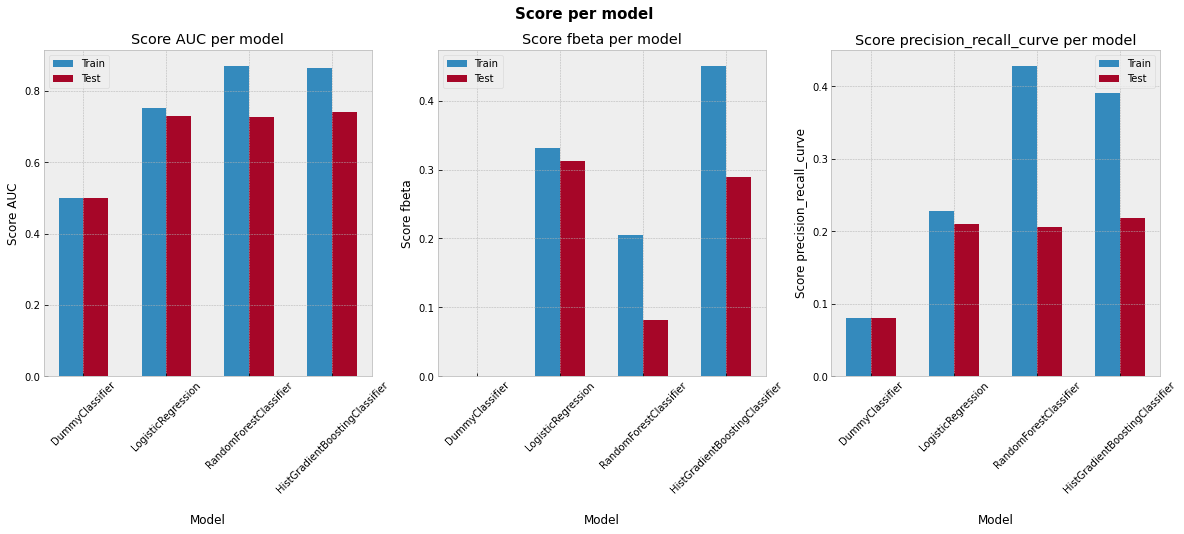

In [45]:
# %%flake8

# use function graph_score_model to display score for each models
graph_score_model(result)

In [46]:
# %%flake8

def graph_time_model(results):
    ''' create a function du display graph of the time for each model '''

    width = 0.2
    x = np.arange(len(results))
    fig, ax = plt.subplots(figsize=(7, 5))

    ax.bar(x - width/2, results['mean_score_time'],
           width, label='Predict')
    ax.bar(x + width/2, results['mean_fit_time'],
           width, label='Fit')

    ax.set_xlabel('\nModel')
    ax.set_ylabel('Time(s)')
    plt.title('Time per model')
    plt.xticks(x, results['Model'], rotation=45)
    ax.legend()

    # to save graph
    plt.savefig('Time per model.png', bbox_inches='tight')

    plt.show()

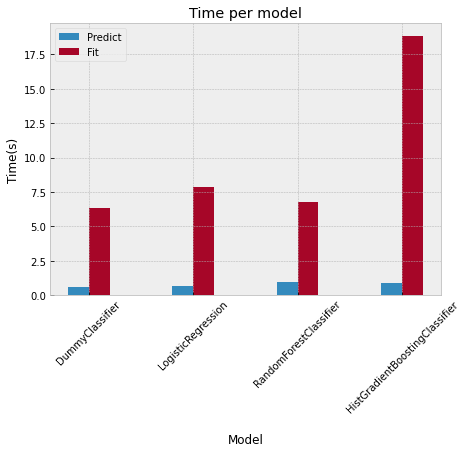

In [47]:
# %%flake8

# use function graph_time_model to display time for each models
graph_time_model(result)

### Compare predict values

In [48]:
# %%flake8

def predict_proba_y(model, X):
    ''' function to predict_proba for a model '''
    # predict probabilities for DummyClassifier
    y_predict = model.predict_proba(X)
    
    # keep probabilities for the positive outcome only
    y_predict = y_predict[:, 1]
    
    return y_predict

In [67]:
# %%flake8

# predict probabilities for DummyClassifier
y_predict_dc = predict_proba_y(random_dc, X_test)

In [68]:
# %%flake8

# predict probabilities for LogisticsRegression
y_predict_lr = predict_proba_y(random_lr, X_test)

In [69]:
# %%flake8

# predict probabilities for RandomForestClassifier
y_predict_rfc = predict_proba_y(random_rfc, X_test)

In [70]:
# %%flake8

# predict probabilities for HistGrandientBoostingClassifier
y_predict_hgbc = predict_proba_y(random_hgbc, X_test)

 ### Receiver Operating Characteristic (ROC) curve

For LogisticsRegression the best Threshold=0.296218,       G-Mean=0.676
For RandomForestClassifier the best Threshold=0.286721,       G-Mean=0.675
For HistGrandientBoostingClassifier the best Threshold=0.264852,       G-Mean=0.682


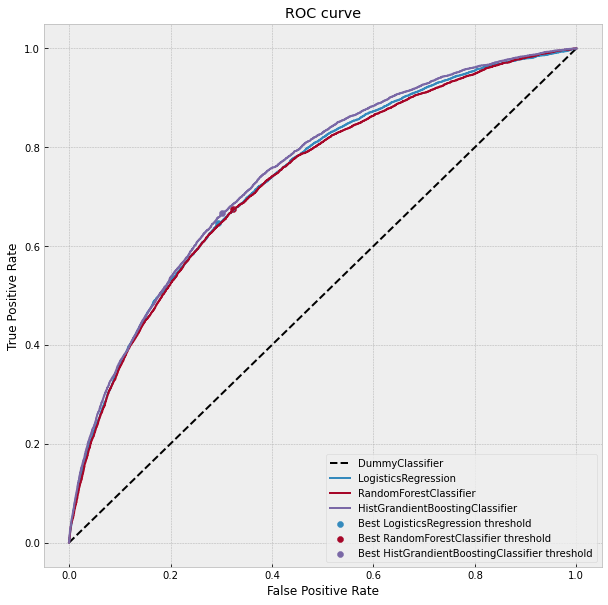

In [54]:
# %%flake8

# calculate roc curves for DummyClassifier
fpr_dc, tpr_dc, thresholds_dc = roc_curve(y_test, y_predict_dc)

# calculate roc curves for LogisticsRegression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_predict_lr)

# calculate roc curves for RandomForestClassifier
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_predict_rfc)

# calculate roc curves for HistGrandientBoostingClassifier
fpr_hgbc, tpr_hgbc, thresholds_hgbc = roc_curve(y_test, y_predict_hgbc)

# calculate the g-mean for each threshold of LogisticsRegression
gmeans_lr = np.sqrt(tpr_lr * (1-fpr_lr))
# locate the index of the largest g-mean
ix_lr = np.argmax(gmeans_lr)
print('For LogisticsRegression the best Threshold=%f, \
      G-Mean=%.3f' % (thresholds_lr[ix_lr], gmeans_lr[ix_lr]))

# calculate the g-mean for each threshold of RandomForestClassifier
gmeans_rfc = np.sqrt(tpr_rfc * (1-fpr_rfc))
# locate the index of the largest g-mean
ix_rfc = np.argmax(gmeans_rfc)
print('For RandomForestClassifier the best Threshold=%f, \
      G-Mean=%.3f' % (thresholds_rfc[ix_rfc], gmeans_rfc[ix_rfc]))

# calculate the g-mean for each threshold of HistGrandientBoostingClassifier
gmeans_hgbc = np.sqrt(tpr_hgbc * (1-fpr_hgbc))
# locate the index of the largest g-mean
ix_hgbc = np.argmax(gmeans_hgbc)
print('For HistGrandientBoostingClassifier the best Threshold=%f, \
      G-Mean=%.3f' % (thresholds_hgbc[ix_hgbc], gmeans_hgbc[ix_hgbc]))

# plot the roc curve for the model
plt.figure(figsize=(10, 10))

plt.plot(fpr_dc, tpr_dc, linestyle='--', color='black',
         label='DummyClassifier')
plt.plot(fpr_lr, tpr_lr, label='LogisticsRegression')
plt.scatter(fpr_lr[ix_lr], tpr_lr[ix_lr], marker='o',
            label='Best LogisticsRegression threshold')
plt.plot(fpr_rfc, tpr_rfc, label='RandomForestClassifier')
plt.scatter(fpr_rfc[ix_rfc], tpr_rfc[ix_rfc], marker='o',
            label='Best RandomForestClassifier threshold')
plt.plot(fpr_hgbc, tpr_hgbc, label='HistGrandientBoostingClassifier')
plt.scatter(fpr_hgbc[ix_hgbc], tpr_hgbc[ix_hgbc], marker='o',
            label='Best HistGrandientBoostingClassifier threshold')


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
# show the plot
plt.show()

### Precision-Recall curve

C:\Users\Hugues\AppData\Local\Temp/ipykernel_13100/232781605.py:16: RuntimeWarning: invalid value encountered in true_divide
  fscore_lr = (2 * precision_lr * recall_lr) / (precision_lr + recall_lr)
C:\Users\Hugues\AppData\Local\Temp/ipykernel_13100/232781605.py:22: RuntimeWarning: invalid value encountered in true_divide
  fscore_rfc = (2 * precision_rfc * recall_rfc) / (precision_rfc + recall_rfc)


Best Threshold=0.999973, F-Score=nan
Best Threshold=0.647880, F-Score=nan
Best Threshold=0.448786, F-Score=0.292


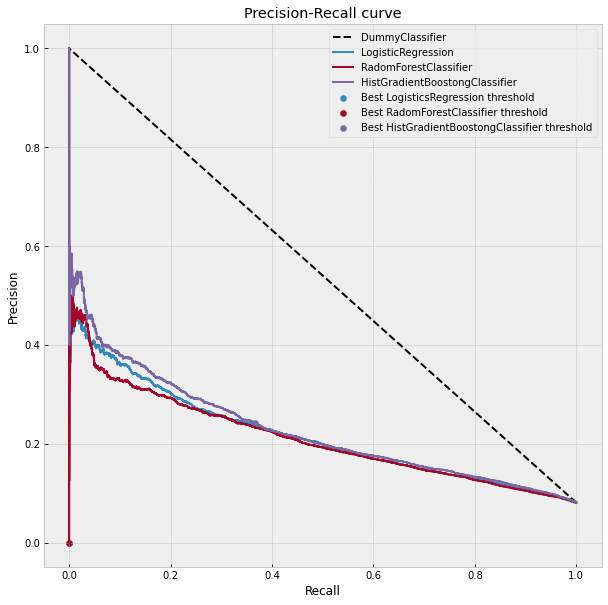

In [74]:
# %%flake8

# calculate Precision-Recall curve for DummyClassifier
precision_dc, recall_dc, thresholds_dc = precision_recall_curve(y_test, y_predict_dc)

# calculate Precision-Recall curve for LogisticRegression
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_predict_lr)

# calculate Precision-Recall curve for RadomForestClassifier
precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(y_test, y_predict_rfc)

# calculate Precision-Recall curve for HistGradientBoostongClassifier
precision_hgbc, recall_hgbc, thresholds_hgbc = precision_recall_curve(y_test, y_predict_hgbc)

# convert to f score for LogisticRegression
fscore_lr = (2 * precision_lr * recall_lr) / (precision_lr + recall_lr)
# locate the index of the largest f score
ix_lr = np.argmax(fscore_lr)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds_lr[ix_lr], fscore_lr[ix_lr]))

# convert to f score for RadomForestClassifier
fscore_rfc = (2 * precision_rfc * recall_rfc) / (precision_rfc + recall_rfc)
# locate the index of the largest f score
ix_rfc = np.argmax(fscore_rfc)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds_rfc[ix_rfc], fscore_rfc[ix_rfc]))

# convert to f score for HistGrandientBoostingClassifier
fscore_hgbc = (2 * precision_hgbc * recall_hgbc) / (precision_hgbc + recall_hgbc)
# locate the index of the largest f score
ix_hgbc = np.argmax(fscore_hgbc)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds_hgbc[ix_hgbc], fscore_hgbc[ix_hgbc]))


# plot the roc curve for the model
plt.figure(figsize=(10, 10))

plt.plot(recall_dc, precision_dc, linestyle='--', color='black',
         label='DummyClassifier')
plt.plot(recall_lr, precision_lr, label='LogisticRegression')
plt.scatter(recall_lr[ix_lr], precision_lr[ix_lr], marker='o', label='Best LogisticsRegression threshold')
plt.plot(recall_rfc, precision_rfc, label='RadomForestClassifier')
plt.scatter(recall_rfc[ix_rfc], precision_rfc[ix_rfc], marker='o', label='Best RadomForestClassifier threshold')
plt.plot(recall_hgbc, precision_hgbc, label='HistGradientBoostongClassifier')
plt.scatter(recall_hgbc[ix_hgbc], precision_hgbc[ix_hgbc], marker='o', label='Best HistGradientBoostongClassifier threshold')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
# show the plot
plt.show()

### Threshold Tuning

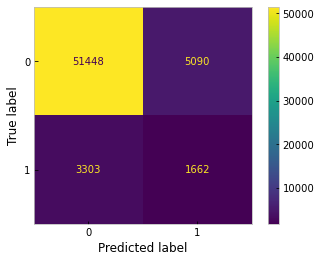

In [135]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(None)
plt.show()

In [93]:
(y_test == 1).sum()

4965

In [116]:
# evaluate the model
score_base = fbeta_score(y_test, (y_predict_lr >= 0.5).astype('int'), beta=2)
print('F2score: %.5f' % score_base)

F2score: 0.31227


In [114]:
# search thresholds for imbalanced classification

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')
 
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [fbeta_score(y_test, to_labels(y_predict_lr, t), beta=2) for t in thresholds]
# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F2score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.296, F2score=0.40409


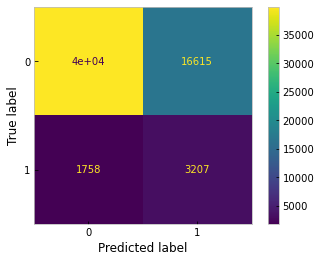

In [136]:
cm = confusion_matrix(y_test, (y_predict_lr >= thresholds[ix]).astype('int'))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(None)
plt.show()